<a href="https://colab.research.google.com/github/farahhnfh/Tugas-Python/blob/main/Tugas_P11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [443]:
cd /content/drive/MyDrive/Tugas

/content/drive/.shortcut-targets-by-id/1NRJMHJSJKzQRxLNxkGb5ngeYjPjLds9o/Tugas


In [444]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [445]:
ls

 3scene@         contoh.jpg   daun1.jpg            model1/
'contoh 2.jpg'   Daun/       'forest contoh.jpg'   pantai.jpg


In [446]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [447]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labes
print("[INFO] loading images...")
imagePaths = paths.list_images("Daun")
data = []
labels = []

[INFO] loading images...


In [448]:
# loop over our input images
for imageOne in imagePaths:

  image = Image.open(imageOne)
  image = np.array(image.resize((256,256))) / 255.0
  data.append(image)

  label = imageOne.split(os.path.sep)[-2]
  labels.append(label)

In [449]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [450]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [451]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [452]:
# training, test split
# training and 25% for eval
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle = True)
print(trainX.shape)
print(testX.shape)

(444, 256, 256, 3)
(148, 256, 256, 3)


In [454]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))

#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))


model1.summary()

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_64 (Flatten)         (None, 123008)            0         
_________________________________________________________________
dense_122 (Dense)            (None, 100)               12300900  
_________________________________________________________________
dense_123 (Dense)            (None, 5)               

In [394]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential (
    [
     Flatten(input_shape=(128*128*3,)),
     Dense(100, activation="relu", name="layer1"),
     Dense(16, activation="relu", name="layer2"),
     Dense(16, activation="relu", name ="layer3"),
     Dense(3, activation= "softmax", name="layer4"),
    ]
)

In [396]:
model.summary()

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_60 (Flatten)         (None, 49152)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               4915300   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 4,917,239
Trainable params: 4,917,239
Non-trainable params: 0
_________________________________________________________________


In [455]:
print("training")
opt = Adam(lr=1e-3, decay=1e-3/50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, 
              metrics=["accuracy"])


training


In [456]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 28s 2s/step - loss: 6.1389 - accuracy: 0.2027 - val_loss: 1.7116 - val_accuracy: 0.1959
Epoch 2/25
14/14 [==============================] - 28s 2s/step - loss: 1.5607 - accuracy: 0.2860 - val_loss: 1.5406 - val_accuracy: 0.3446
Epoch 3/25
14/14 [==============================] - 29s 2s/step - loss: 1.2971 - accuracy: 0.4640 - val_loss: 1.2794 - val_accuracy: 0.5068
Epoch 4/25
14/14 [==============================] - 29s 2s/step - loss: 0.9920 - accuracy: 0.6014 - val_loss: 1.3233 - val_accuracy: 0.5135
Epoch 5/25
14/14 [==============================] - 28s 2s/step - loss: 0.7151 - accuracy: 0.7680 - val_loss: 1.1515 - val_accuracy: 0.5608
Epoch 6/25
14/14 [==============================] - 29s 2s/step - loss: 0.5181 - accuracy: 0.8378 - val_loss: 1.0863 - val_accuracy: 0.5946
Epoch 7/25
14/14 [==============================] - 29s 2s/step - loss: 0.3111 - accuracy: 0.9189 - val_loss: 1.0250 - val_accuracy: 0.6824
Epoch 8/25
14/14 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


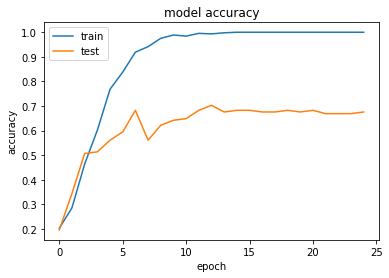

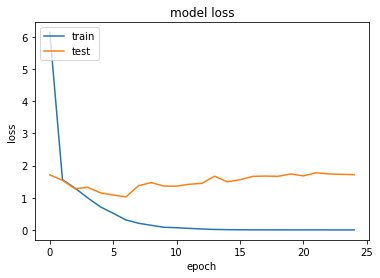

In [457]:
import matplotlib.pyplot as plt

print(H.history.keys())
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [458]:
print("[info] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[info] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.66      0.85      0.74        27
      GMB_03       0.81      0.71      0.76        31
      GMB_04       0.50      0.52      0.51        23
      GMB_06       0.75      0.63      0.69        38
      GMB_07       0.63      0.66      0.64        29

    accuracy                           0.68       148
   macro avg       0.67      0.67      0.67       148
weighted avg       0.68      0.68      0.68       148



In [459]:
model.save('model1')

INFO:tensorflow:Assets written to: model1/assets


In [460]:
import cv2
import matplotlib.pyplot as plt
image1='daun1.jpg'

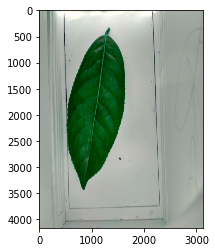

In [461]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [463]:
image_testing = Image.open('daun1.jpg')
image_testing = np.array(image_testing.resize((256,256)))/ 255.0
image_testing.shape

(256, 256, 3)

In [464]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 256, 256, 3)


In [466]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[1.17681665e-07 9.99913812e-01 5.35834658e-07 8.41392030e-05
  1.44058163e-06]]
['GMB_03']
